# Họ Và Tên : Vũ Hải Ninh
# MSSV: 2001485

## câu 1:

=> Hàm mục tiêu có dạng: 
$$f_{0}(x) = 250000x_{1} + 180000x_{2}$$

- Ràng buộc (1):
$$12x_{1} + x_{2}9 \leqslant 900 $$
$$ x_{1}\leqslant 45 $$
$$ x_{2}\leqslant 80  $$

- Suy ra:
$$A = \begin{bmatrix}12 & 9\\0 & 1 \\ 1 & 0 \end{bmatrix}, b = \begin{bmatrix}900\\80\\45 \end{bmatrix} $$  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog
import cvxpy as cp

In [38]:
x1 = cp.Variable()
x2 = cp.Variable()


# Hàm mục tiêu
objective_function = cp.Maximize(250000*x1 + 180000*x2 )

# Ràng buộc
constraints = [12*x1 + 9*x2 <= 900,
               x1-45<=0,
               x2-80<=0,
               x1 >= 0, x2 >= 0,]

# Tạo và giải bài toán
problem = cp.Problem(objective_function, constraints)
problem.solve()

print("radio loai 1:", x1.value)
print("radio loai 2:", x2.value)
print("Tổng doanh thu tối đa:", problem.value)

radio loai 1: 44.999999930744735
radio loai 2: 40.00000009094133
Tổng doanh thu tối đa: 18449999.999055624


In [2]:
import numpy as np

# Dữ liệu bài toán
A = np.array([[0, 1], [1, -2], [-1, -2]])
b = np.array([2, -3, 0])

# Phần a: Tìm x* và P*
def solve_optimal(A, b):
    # Tính x*
    x_star = np.linalg.inv(A.T @ A) @ (A.T @ b)
    # Tính P*
    P_star = 0.5 * np.linalg.norm(A @ x_star - b) ** 2
    return x_star, P_star

x_star, P_star = solve_optimal(A, b)
print("Phần a:")
print("Điểm tối ưu x*:", x_star)
print("Giá trị tối ưu P*:", P_star)

# Phần b: Sử dụng Gradient Descent
def gradient(x, A, b):
    return A.T @ (A @ x - b)

def gradient_descent(A, b, x0, learning_rate, max_iter, tolerance):
    x = x0
    history = []
    for i in range(max_iter):
        grad = gradient(x, A, b)
        x_next = x - learning_rate * grad
        history.append((i, x, grad, f(x, A, b)))
        if np.linalg.norm(x_next - x) < tolerance:
            break
        x = x_next
    return x, f(x, A, b), history

# Hàm f(x)
def f(x, A, b):
    return 0.5 * np.linalg.norm(A @ x - b) ** 2

# Tham số Gradient Descent
x0 = np.array([-3, 5])  # Giá trị ban đầu
learning_rate = 0.01  # Learning rate
max_iter = 100  # Số vòng lặp tối đa
tolerance = 1e-6  # Tiêu chí dừng

x_opt, f_opt, history = gradient_descent(A, b, x0, learning_rate, max_iter, tolerance)

print("\nPhần b:")
print("Nghiệm tìm được từ Gradient Descent:", x_opt)
print("Giá trị hàm mục tiêu tại nghiệm:", f_opt)
print("Số vòng lặp đã thực hiện:", len(history))



Phần a:
Điểm tối ưu x*: [-1.5         0.88888889]
Giá trị tối ưu P*: 0.6944444444444445

Phần b:
Nghiệm tìm được từ Gradient Descent: [-1.69892933  0.88921857]
Giá trị hàm mục tiêu tại nghiệm: 0.7340178134205446
Số vòng lặp đã thực hiện: 100


# câu2

In [34]:
from scipy.optimize import minimize

A = np.array([[1, 0], [0, -2]])
b = np.array([2, 4])

def f(x):
    Ax_b = np.dot(A, x) - b  
    return np.exp(2 * x[0]) + 0.5 * np.linalg.norm(Ax_b)**2 

x0 = np.array([0, 0])  
result = minimize(f, x0)
x_star = result.x
p_star = result.fun

print("Điểm tối ưu x*:", x_star)
print("Giá trị tối ưu p*:", p_star)

Điểm tối ưu x*: [-2.36058005e-07 -2.00000005e+00]
Giá trị tối ưu p*: 3.000000000000144


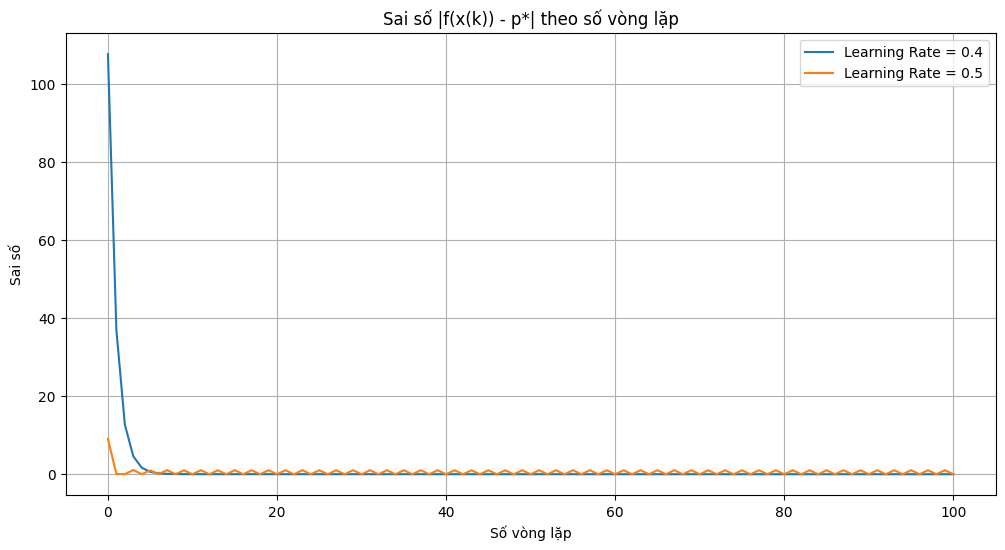

Learning Rate: 0.4
x(0) = [-3.  5.], f(x(0)) = 110.50247875217669
x(1) = [-1.001983 -6.2     ], f(x(1)) = 39.920750577355
x(2) = [0.09097051 0.52      ], f(x(2)) = 15.72254024160896
x(3) = [-0.10505245 -3.512     ], f(x(3)) = 7.598410130547686
x(4) = [ 0.08856916 -1.0928    ], f(x(4)) = 4.66660381395919
x(5) = [-0.10189547 -2.54432   ], f(x(5)) = 3.6171836756226567
x(6) = [ 0.08635642 -1.673408  ], f(x(6)) = 3.232865303462641
x(7) = [-0.09900595 -2.1959552 ], f(x(7)) = 3.100069962645209
x(8) = [ 0.08430836 -1.88242688], f(x(8)) = 3.0462504833899042
x(9) = [-0.09634809 -2.07054387], f(x(9)) = 3.0320230373229626
x(10) = [ 0.08240514 -1.95767368], f(x(10)) = 3.021337443320407
x(11) = [-0.09389242 -2.02539579], f(x(11)) = 3.022275637789714
x(12) = [ 0.08063014 -1.98476252], f(x(12)) = 3.0174454468034595
x(13) = [-0.09161452 -2.00914249], f(x(13)) = 3.02017026090515
x(14) = [ 0.07896934 -1.99451451], f(x(14)) = 3.016333958983075
x(15) = [-0.0894939  -2.00329129], f(x(15)) = 3.01913014260450

In [43]:
A = np.array([[1, 0], [0, -2]])
b = np.array([2, 4])

def f(x):
    Ax_b = np.dot(A, x) - b  
    return np.exp(2 * x[0]) + 0.5 * np.linalg.norm(Ax_b)**2  

def grad_f(x):
    Ax_b = np.dot(A, x) - b  
    grad = np.zeros(2)
    grad[0] = 2 * np.exp(2 * x[0]) + np.dot(A[0], Ax_b)  
    grad[1] = np.dot(A[1], Ax_b)  
    return grad

def gradient_descent(x0, learning_rate, max_iterations):
    x = x0
    x_history = [x0]  
    f_values = [f(x)]  

    for k in range(max_iterations):
        x = x - learning_rate * grad_f(x)  
        x_history.append(x)
        f_values.append(f(x))

    return np.array(x_history), np.array(f_values)

x0 = np.array([-3, 5])
max_iterations = 100

learning_rates = [2/5, 1/2]  
histories = {}
f_histories = {}

for lr in learning_rates:
    histories[lr], f_histories[lr] = gradient_descent(x0, lr, max_iterations)

# Vẽ đồ thị sai số |f(x(k)) - p*|
plt.figure(figsize=(12, 6))
for lr in learning_rates:
    plt.plot(range(max_iterations + 1), np.abs(f_histories[lr] - f_histories[lr][-1]), label=f'Learning Rate = {lr}')
    
plt.title('Sai số |f(x(k)) - p*| theo số vòng lặp')
plt.xlabel('Số vòng lặp')
plt.ylabel('Sai số')
plt.legend()
plt.grid()
plt.show()

for lr in learning_rates:
    print(f"Learning Rate: {lr}")
    for k in range(len(histories[lr])):
        print(f"x({k}) = {histories[lr][k]}, f(x({k})) = {f_histories[lr][k]}")

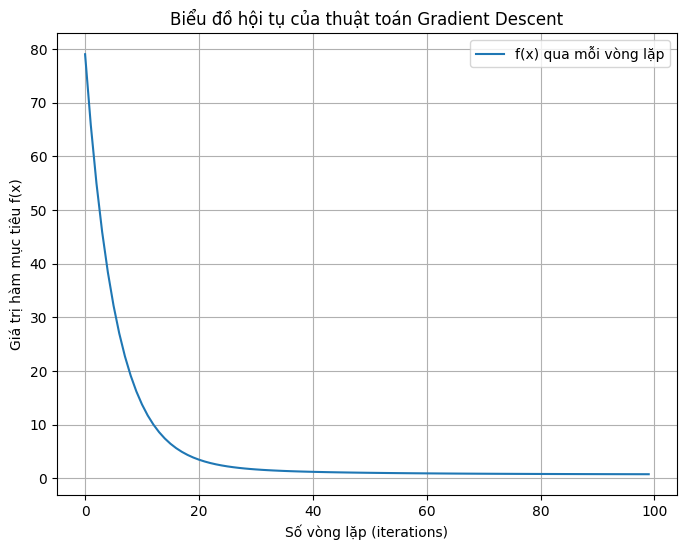

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Dữ liệu bài toán
A = np.array([[0, 1], [1, -2], [-1, -2]])
b = np.array([2, -3, 0])

# Hàm f(x)
def f(x, A, b):
    return 0.5 * np.linalg.norm(A @ x - b) ** 2

# Gradient của f(x)
def gradient(x, A, b):
    return A.T @ (A @ x - b)

# Gradient Descent
def gradient_descent(A, b, x0, learning_rate, max_iter, tolerance):
    x = x0
    history = []  # Lưu giá trị f(x) trong mỗi vòng lặp
    for i in range(max_iter):
        grad = gradient(x, A, b)
        x_next = x - learning_rate * grad
        history.append(f(x, A, b))
        if np.linalg.norm(x_next - x) < tolerance:
            break
        x = x_next
    return x, f(x, A, b), history

# Tham số Gradient Descent
x0 = np.array([-3, 5])  # Giá trị ban đầu
learning_rate = 0.01  # Learning rate
max_iter = 100  # Số vòng lặp tối đa
tolerance = 1e-6  # Tiêu chí dừng

# Chạy Gradient Descent
x_opt, f_opt, history = gradient_descent(A, b, x0, learning_rate, max_iter, tolerance)

# Vẽ biểu đồ
plt.figure(figsize=(8, 6))
plt.plot(range(len(history)), history, linestyle='-', label='f(x) qua mỗi vòng lặp')
plt.title('Biểu đồ hội tụ của thuật toán Gradient Descent')
plt.xlabel('Số vòng lặp (iterations)')
plt.ylabel('Giá trị hàm mục tiêu f(x)')
plt.grid()
plt.legend()
plt.show()
